# KMeans - Agrupamento de Dados

### Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Carregando a base de dados iris

In [4]:
#dados na pasta
iris = pd.read_csv("iris.csv")

In [5]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


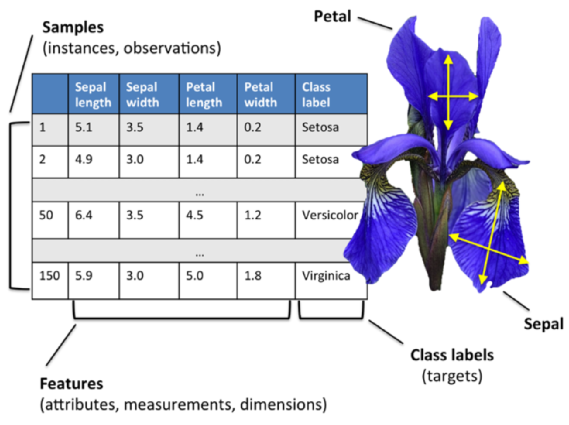

In [6]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=500)

### Separando os valores de dados e classes

In [15]:
# X-dados 
# Classe: Virginica, Versicolor, Setosa 
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
#Classes
y = iris.Species
y.unique() # Valores unicos  de espécies

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Convertendo valores categórios de classe em numéricos

In [10]:
#Transformando a classe de "str" para numérica

#Iris-virginica - 0
#Iris-setosa - 1
#Iris-versicolor - 2
############################################3
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [11]:
y = y.apply(converte_classe)
y.value_counts()

1    50
2    50
0    50
Name: Species, dtype: int64

In [12]:
y.unique()

array([1, 2, 0])

### Instânciando o Algoritmo K-means com 3 clusters 

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [16]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

### Centroids 

In [17]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [18]:
# Centroide: coordenadas X e coordenadas Y
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

(array([5.9016129, 6.85     , 5.006    ]),
 array([2.7483871 , 3.07368421, 3.418     ]))

### Tabela de distância 

In [19]:
#Distância de cada dado aos três centróides
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 3.41925061, 5.0595416 ],
       [0.43816892, 3.39857426, 5.11494335],
       [0.41230086, 3.56935666, 5.27935534],
       [0.51883716, 3.42240962, 5.15358977],
       [0.19796969, 3.46726403, 5.10433388],
       [0.68380699, 3.14673162, 4.68148797],
       [0.41520116, 3.51650264, 5.21147652],
       [0.0599333 , 3.33654987, 5.00252706],
       [0.80099438, 3.57233779, 5.32798107],
       [0.36659514, 3.3583767 , 5.06790865],
       [0.48784424, 3.32449131, 4.89806763],
       [0.25138019, 3.31126872, 4.9966845 ],
       [0.49192682, 3.46661272, 5.19103612],
       [0.90906105, 3.90578362, 5.65173594],
       [1.02019214, 3.646649  , 5.10804455],
       [1.21309192, 3.49427881, 4.88564095],
       [0.66241377, 3.495248  , 5.03090587],
       [0.1509702 , 3.38444981, 5.02342022],
       [0.82848778, 3.11245944, 4.61792995],
       [0.39898872, 3.37738931, 4.97213426],
       [0.46172719, 3.07471224, 4.6955761 ],
       [0.33762701, 3.31506588, 4.9236821 ],
       [0.

### Imprimindo Rótulos 

In [30]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

### Visualizando os Centroids

<IPython.core.display.Javascript object>


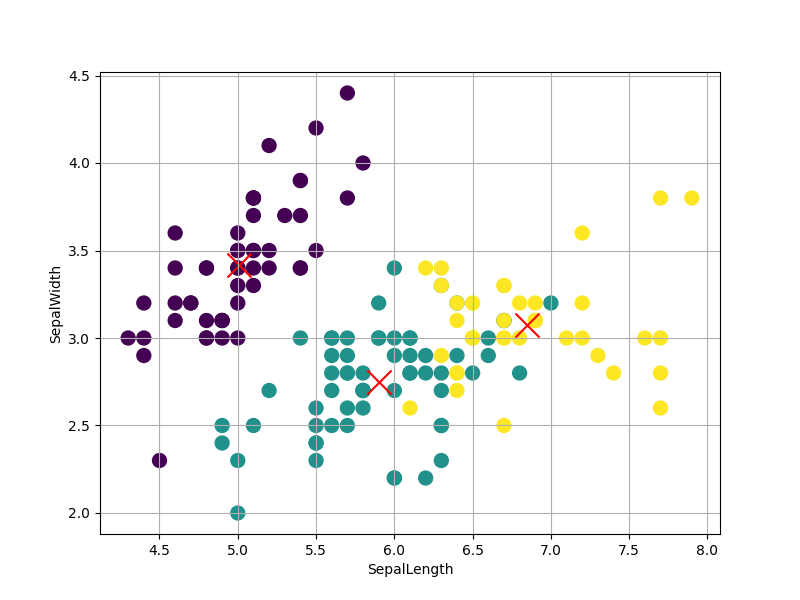

In [36]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='x' ,s = 300, c = 'red',label = 'Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.grid()
plt.show()

### Agrupando novos dados

In [39]:
# Dados aleatórios
data = [[ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]]
kmeans.predict(data)

/home/diego/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 2, 1], dtype=int32)

### Visualizando os resultados

<IPython.core.display.Javascript object>


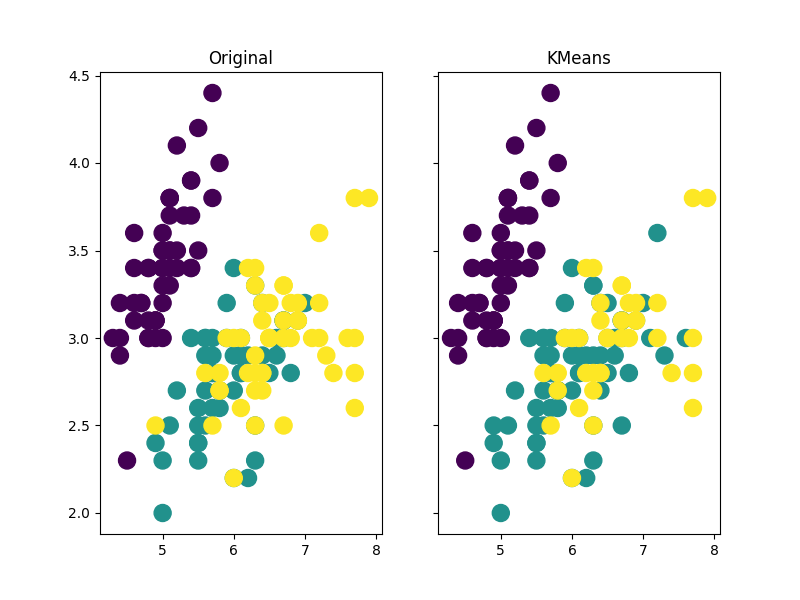

In [41]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))

ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))



### Estimando o valor do parametro K - Método Elbow (ou método de cotovelo)

* Como o KMeans calcula a distância das observações até o centro do agrupamento que ela pertence, o ideal é que essa distância seja a menor viável. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para wcss) seja a menor possível, sendo zero o resultado ótimo.


* Deve-se ponderar para que não haja overfitting, ou seja, o valor "ótimo" de cluster a se escolher pode ser no "cotovelo" do gráfico entre os números de cluster X distância da soma dos quadrados

https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

1 680.8244000000001
2 152.36870647733903
3 78.94084142614602
4 57.31787321428571
5 46.55057267267268
6 39.27787900008488
7 34.52842210025956
8 30.07753099838969
9 28.23621418931945
10 26.62430347834141


<IPython.core.display.Javascript object>


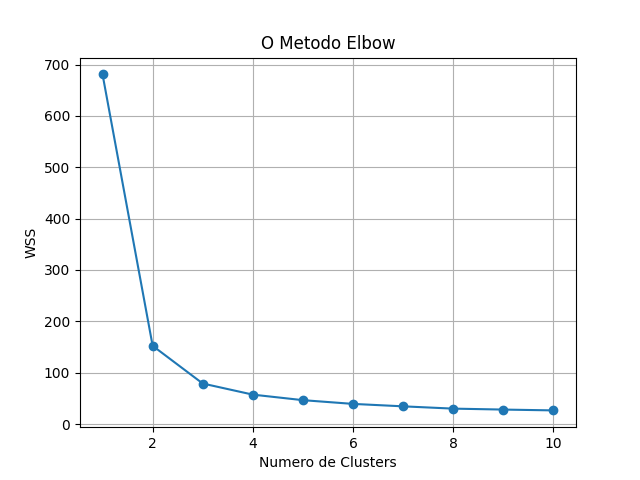

In [42]:
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss,'o-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares! Erro quadrático
plt.grid()
plt.show()

## Técnicas de Validação

### Aqui abordagem das métricas avaliativas do modelo

### Matriz de Confusão

In [22]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        14   0  36   50
1         0  50   0   50
2        48   0   2   50
All      62  50  38  150


### Metricas de classificação

In [23]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.23      0.28      0.25        50
   Cluster 1       1.00      1.00      1.00        50
   Cluster 0       0.05      0.04      0.05        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150

